<a href="https://colab.research.google.com/github/apchavezr/18.-Modelado-y-simulaci-n/blob/main/simulacion_inventario_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de inventarios con demanda aleatoria (Poisson)

Este notebook ilustra paso a paso la simulación de un modelo de inventario con demanda diaria que sigue una distribución de Poisson con parámetro $( \lambda = 10 )$. Se analiza el comportamiento del inventario bajo una política de reabastecimiento simple.

In [1]:
# Paso 1: Generación de la demanda aleatoria
import numpy as np

np.random.seed(42)
demanda = np.random.poisson(lam=10, size=30)
print("Demanda diaria simulada:", demanda)

Demanda diaria simulada: [12  6 11 14  7  8  9 11  8 10  7 11 11  8 12  6  7  8 10  5  3  9 13  8
  6 13 12 13  9 14]


In [2]:
# Paso 2: Definición de parámetros del sistema
nivel_inicial = 50
umbral_reorden = 20
cantidad_reorden = 50
dias = 30

In [3]:
# Paso 3: Simulación de la política de inventario
inventario = [nivel_inicial]
ordenes = []
faltantes = []

for dia in range(dias):
    disponible = inventario[-1]
    demanda_dia = demanda[dia]
    vendido = min(disponible, demanda_dia)
    faltante = max(0, demanda_dia - disponible)
    restante = disponible - vendido

    if restante < umbral_reorden:
        orden = cantidad_reorden
        restante += orden
    else:
        orden = 0

    inventario.append(restante)
    ordenes.append(orden)
    faltantes.append(faltante)

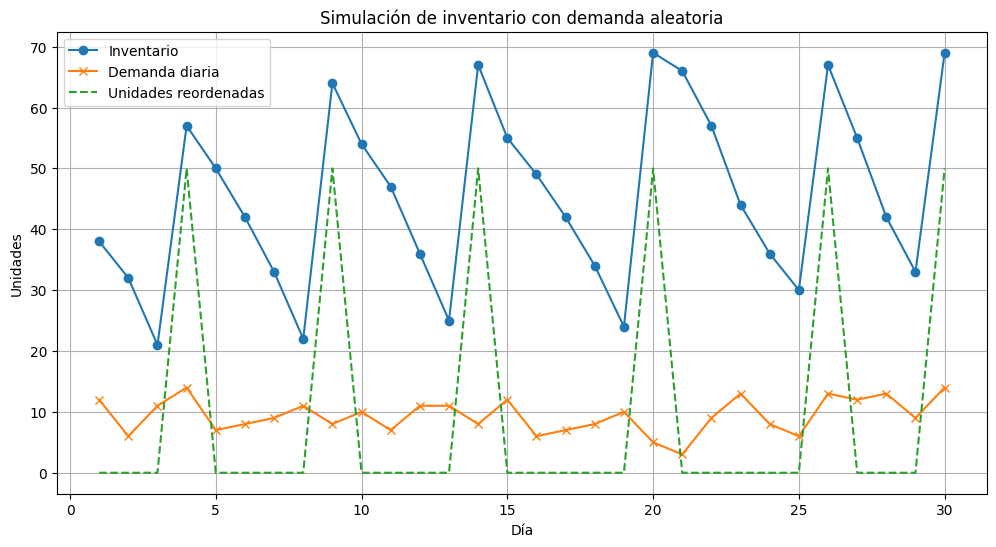

In [5]:
# Paso 4: Visualización de los resultados
import matplotlib.pyplot as plt

dias_eje = np.arange(1, dias + 1)

plt.figure(figsize=(12,6))
plt.plot(dias_eje, inventario[1:], label='Inventario', marker='o')
plt.plot(dias_eje, demanda, label='Demanda diaria', marker='x')
plt.plot(dias_eje, ordenes, label='Unidades reordenadas', linestyle='--')
plt.title('Simulación de inventario con demanda aleatoria')
plt.xlabel('Día')
plt.ylabel('Unidades')
plt.legend()
plt.grid(True)
plt.show()

# Conclusión general

La simulación evidencia que, para una demanda con $λ=10$, una política de reabastecimiento basada en un umbral de 20 unidades y una reposición de 50 unidades mantiene el inventario de manera estable y eficiente.

Esta política es recomendable en entornos con demanda moderadamente variable y predecible, pero se recomienda ajustar los parámetros si se introduce más incertidumbre o mayor variabilidad en la demanda.